In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
def datasets(PATH):
    labels = ['female','male']
    data = []
    for i in range(2):
        PATH_new = PATH + labels[i] + "\\*"
        print(PATH)
        for rasm in glob.glob(PATH_new):
            rasm = cv2.imread(rasm)
            rasm = cv2.resize(rasm,(96,96))
            data.append((rasm,i))
    return data

In [5]:
train_dir = 'C:/Users/Lucas/Desktop/ML_data/Gender/Train/'
test_dir = 'C:/Users/Lucas/Desktop/ML_data/Gender/Test/'

In [6]:
train_dataset = datasets(train_dir)
test_dataset = datasets(test_dir)

C:/Users/Lucas/Desktop/ML_data/Gender/Train/
C:/Users/Lucas/Desktop/ML_data/Gender/Train/
C:/Users/Lucas/Desktop/ML_data/Gender/Test/
C:/Users/Lucas/Desktop/ML_data/Gender/Test/


In [7]:
type(train_dataset)

list

In [8]:
x_train,y_train = np.array([i[0] for i in train_dataset],dtype=np.uint8),np.array([i[1] for i in train_dataset],dtype=np.uint8)

In [9]:
print(x_train.shape)
print(y_train.shape)

(47009, 96, 96, 3)
(47009,)


In [10]:
x_test,y_test = np.array([i[0] for i in test_dataset],dtype=np.uint8),np.array([i[1] for i in test_dataset],dtype=np.uint8)

In [11]:
print(x_test.shape)
print(y_test.shape)

(11649, 96, 96, 3)
(11649,)


In [13]:
print("----TRAIN dataset----")
print("Every humans =",len(train_dataset))
print("Women's img =",len([i for i in train_dataset if i[1]==0]))
print("Men's img =",len([i for i in train_dataset if i[1]==1]))

----TRAIN dataset----
Every humans = 47009
Women's img = 23243
Men's img = 23766


In [14]:
print("----TEST dataset----")
print("Every humans =",len(test_dataset))
print("Women's img =",len([i for i in test_dataset if i[1]==0]))
print("Men's img =",len([i for i in test_dataset if i[1]==1]))

----TEST dataset----
Every humans = 11649
Women's img = 5841
Men's img = 5808


In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [16]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1470/1470 [==============================] - 544s 367ms/step - loss: 0.3151 - accuracy: 0.8980
Epoch 2/5
1470/1470 [==============================] - 290s 197ms/step - loss: 0.1596 - accuracy: 0.9419
Epoch 3/5
1470/1470 [==============================] - 287s 195ms/step - loss: 0.1421 - accuracy: 0.9471
Epoch 4/5
1470/1470 [==============================] - 293s 199ms/step - loss: 0.1261 - accuracy: 0.9547
Epoch 5/5
1470/1470 [==============================] - 281s 191ms/step - loss: 0.1191 - accuracy: 0.9571


In [17]:
model.evaluate(x_test,y_test)

365/365 [==============================] - 19s 50ms/step - loss: 0.1144 - accuracy: 0.9584


[0.1144256442785263, 0.9583654999732971]

1/1 [==============================] - 0s 294ms/step
[[0.9999401]]


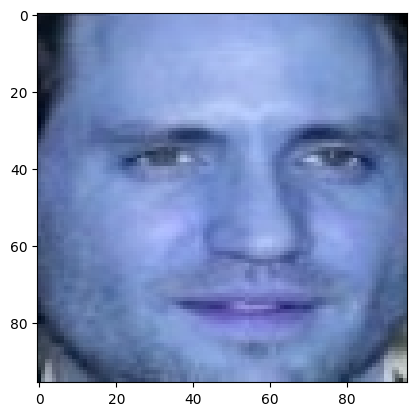

In [18]:
i = 9000
rasm = np.expand_dims(x_test[i],0)
print(model.predict(rasm))
plt.imshow(x_test[i])

One-Hot encoding

In [19]:
def datasets(PATH):
    labels = ['female','male']
    data = []
    label = []
    onehot = [[1,0],[0,1]]
    for i in range(2):
        PATH_new = PATH + labels[i] + "\\*"
        print(PATH)
        for rasm in glob.glob(PATH_new):
            rasm = cv2.imread(rasm)
            rasm = cv2.resize(rasm,(96,96))
            data.append(rasm)
            label.append(onehot[i])
    return np.array(data,dtype=np.uint8),np.array(label,dtype=np.uint8)

In [20]:
x_train,y_train = datasets(train_dir)

C:/Users/Lucas/Desktop/ML_data/Gender/Train/
C:/Users/Lucas/Desktop/ML_data/Gender/Train/


In [21]:
x_train.shape

(47009, 96, 96, 3)

In [22]:
y_train.shape

(47009, 2)

In [23]:
x_test,y_test = datasets(test_dir)

C:/Users/Lucas/Desktop/ML_data/Gender/Test/
C:/Users/Lucas/Desktop/ML_data/Gender/Test/


In [24]:
x_test.shape

(11649, 96, 96, 3)

In [25]:
y_test.shape

(11649, 2)

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [29]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1470/1470 [==============================] - 334s 226ms/step - loss: 0.1130 - accuracy: 0.9584
Epoch 2/2
1470/1470 [==============================] - 231s 157ms/step - loss: 0.1058 - accuracy: 0.9622


In [30]:
model.evaluate(x_test,y_test)

365/365 [==============================] - 13s 34ms/step - loss: 0.1271 - accuracy: 0.9577


[0.12706486880779266, 0.9576787948608398]

1/1 [==============================] - 0s 70ms/step
1
1/1 [==============================] - 0s 27ms/step
[[0. 1.]]


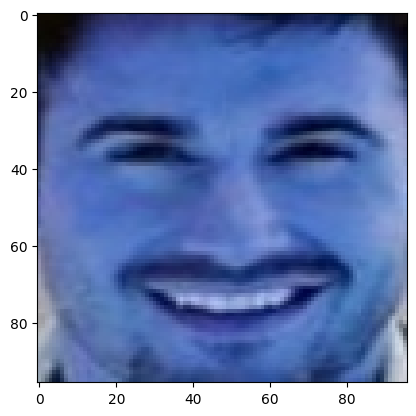

In [31]:
i = 7021
rasm = np.expand_dims(x_test[i],0)
print(np.argmax(model.predict(rasm)))
print(np.around(model.predict(rasm),2))
plt.imshow(x_test[i])